# Random Forest Algorithm with Grid Search 

In addition to Linear Regression, Lasso model and the XGBoost which are instrumental to solve regression problems, Random Forest algorithm by picking the best estimator thanks to the Grid Search could be very instrumental to understand which marketing channel would perform the best in the context of an MMM.

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
mmm_monthly = pd.read_csv("monthly_data.csv")

,Month_Year,Promo_Exists,Consumer_Index,Inflation_Rate,Month,Year,Search_Spend,Display_Spend,Video_Spend,Social_Spend,...,category_Books,category_Clothing,category_Electronics,category_Home,Sales_Channel_Digital Audio,Sales_Channel_Display,Sales_Channel_Offline,Sales_Channel_Search,Sales_Channel_Social,Sales_Channel_Video
0,2023-01-01,0.0,110.7,8.7,31,62713,560659.647938,45208.102841,67172.228831,81064.384011,...,5592.0,5784.0,5670.0,5655.0,2058.0,2019.0,1927.0,8366.0,5226.0,3105.0
1,2023-02-01,0.0,111.1,8.7,56,56644,616143.192518,66448.772797,78538.149311,52526.782535,...,5711.0,5862.0,5846.0,5769.0,2093.0,2169.0,1943.0,8524.0,5253.0,3206.0
2,2023-03-01,0.0,112.5,7.4,93,62713,862763.164401,131477.254094,151254.935531,129206.940666,...,7053.0,7028.0,6898.0,6916.0,2522.0,2600.0,2469.0,10144.0,6433.0,3727.0
3,2023-04-01,1.0,113.0,7.2,120,60690,710072.031003,76216.639453,141208.419860,62459.977221,...,7691.0,7690.0,7698.0,7728.0,2991.0,3034.0,1083.0,11878.0,7424.0,4397.0
4,2023-05-01,0.0,113.2,6.1,155,62713,841390.138288,63280.705977,139730.891301,111711.472990,...,6941.0,7104.0,7043.0,6988.0,2591.0,2526.0,2418.0,10317.0,6357.0,3867.0


In [27]:
from datetime import datetime, date, time, timedelta

mmm_monthly["Date"] = pd.to_datetime(mmm_monthly["Month_Year"])
mmm_monthly["Month"] = mmm_monthly["Date"].dt.month
mmm_monthly["Year"] = mmm_monthly["Date"].dt.year

In [28]:
predictors_randomforest = [
    "Promo_Exists", "Consumer_Index", "Inflation_Rate", "Search_Spend",
    "Display_Spend", "Video_Spend", "Social_Spend", "Digital_Audio_Spend",
    "TV_Spend", "Radio_Spend", "OOH_Spend", "Gross_Rating_Point",
    "Sales_Channel_Digital Audio", "Sales_Channel_Display",
    "Sales_Channel_Offline", "Sales_Channel_Search", "Sales_Channel_Social",
    "Sales_Channel_Video", "Search_Views", "Social_Views", "Video_Views",
    "Display_Views", "Audio_Views", "Search_Clicks", "Social_Clicks",
    "Video_Clicks", "Display_Clicks", "Audio_Clicks", "category_Books",
    "category_Clothing", "category_Electronics", "category_Home"
]

target_randomforest = "revenue"

In [29]:
# Apply MinMaxScaler to selected columns (scaling categorical and media impression data)
scaler_columns_randomforest = [col for col in predictors_randomforest if 
                               "_Views" in col or "_Clicks" in col or "category_" in col or "Sales_Channel_" in col]
scaler_randomforest = MinMaxScaler()
mmm_monthly[scaler_columns_randomforest] = scaler_randomforest.fit_transform(mmm_monthly[scaler_columns_randomforest])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Prepare features (X) and target (y)
X_randomforest = mmm_monthly[predictors_randomforest]
y_randomforest = mmm_monthly[target_randomforest]

# Split data into training and testing sets
X_train_randomforest, X_test_randomforest, y_train_randomforest, y_test_randomforest = train_test_split(
    X_randomforest, y_randomforest, test_size=0.2, random_state=42)

In [32]:
# Initialize Random Forest Regressor
rf_model_randomforest = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_grid_randomforest = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at a leaf node
}

In [33]:
# Initialize GridSearchCV for hyperparameter optimization
grid_search_randomforest = GridSearchCV(estimator=rf_model_randomforest, 
                                        param_grid=param_grid_randomforest, 
                                        scoring='neg_mean_squared_error',  # Optimize for lowest MSE
                                        cv=5,  # 5-fold cross-validation
                                        n_jobs=-1,  # Use all available cores
                                        verbose=2)

In [34]:
# Perform the grid search on training data
grid_search_randomforest.fit(X_train_randomforest, y_train_randomforest)

# Extract the best model after tuning
best_rf_model_randomforest = grid_search_randomforest.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [35]:
# Make predictions using the best model
y_pred_randomforest = best_rf_model_randomforest.predict(X_test_randomforest)

In [36]:
# Evaluate the model performance
r2_randomforest = r2_score(y_test_randomforest, y_pred_randomforest)
mse_randomforest = mean_squared_error(y_test_randomforest, y_pred_randomforest)
rmse_randomforest = np.sqrt(mse_randomforest)
mape_randomforest = mean_absolute_percentage_error(y_test_randomforest, y_pred_randomforest)

# Print evaluation metrics
print("Random Forest Model Evaluation (Optimized):")
print(f"Best Parameters: {grid_search_randomforest.best_params_}")
print(f"R-squared (R²): {r2_randomforest:.2f}")
print(f"Mean Squared Error (MSE): {mse_randomforest:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_randomforest:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_randomforest:.2%}")

Random Forest Model Evaluation (Optimized):
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R-squared (R²): 0.96
Mean Squared Error (MSE): 375497949249.03
Root Mean Squared Error (RMSE): 612778.87
Mean Absolute Percentage Error (MAPE): 7.11%


In [37]:
# Display feature importances from the best model
feature_importances_randomforest = pd.DataFrame({
    "Feature": predictors_randomforest,
    "Importance": best_rf_model_randomforest.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances (Random Forest):")
print(feature_importances_randomforest)


Feature Importances (Random Forest):
                        Feature  Importance
13        Sales_Channel_Display    0.072954
28               category_Books    0.067212
31                category_Home    0.055997
30         category_Electronics    0.055144
15         Sales_Channel_Search    0.053398
16         Sales_Channel_Social    0.052802
24                Social_Clicks    0.052077
25                 Video_Clicks    0.051505
12  Sales_Channel_Digital Audio    0.049982
17          Sales_Channel_Video    0.049634
21                Display_Views    0.048669
23                Search_Clicks    0.047435
26               Display_Clicks    0.046647
18                 Search_Views    0.038815
20                  Video_Views    0.032582
19                 Social_Views    0.031117
27                 Audio_Clicks    0.031011
29            category_Clothing    0.024474
9                   Radio_Spend    0.019455
7           Digital_Audio_Spend    0.017708
10                    OOH_Spend    0.0

In [38]:
# Add predictions to the DataFrame for further analysis
mmm_monthly["predicted_revenue_randomforest"] = best_rf_model_randomforest.predict(X_randomforest)

In [40]:
# Display a sample of the updated DataFrame
print("\nUpdated DataFrame with Predictions:")
print(mmm_monthly[["Month", "Year", "revenue", "predicted_revenue_randomforest"]])


Updated DataFrame with Predictions:
    Month  Year      revenue  predicted_revenue_randomforest
0       1  2023   3596976.95                    4.100895e+06
1       2  2023   4137147.05                    4.224127e+06
2       3  2023   5424847.37                    5.549042e+06
3       4  2023   6818695.19                    6.679165e+06
4       5  2023   5472145.20                    5.481820e+06
5       6  2023   4793197.81                    5.019350e+06
6       7  2023   9543406.16                    9.391321e+06
7       8  2023   5424941.47                    5.475939e+06
8       9  2023   7847352.60                    7.149842e+06
9      10  2023   9463086.69                    9.485492e+06
10     11  2023  17373005.82                    1.617563e+07
11     12  2023  12814905.19                    1.178624e+07
12      1  2024   3504470.42                    3.847903e+06
13      2  2024   4040716.83                    4.192234e+06
14      3  2024   5880560.93                    

<AxesSubplot: xlabel='Digital_Audio_Spend', ylabel='predicted_revenue_randomforest'>

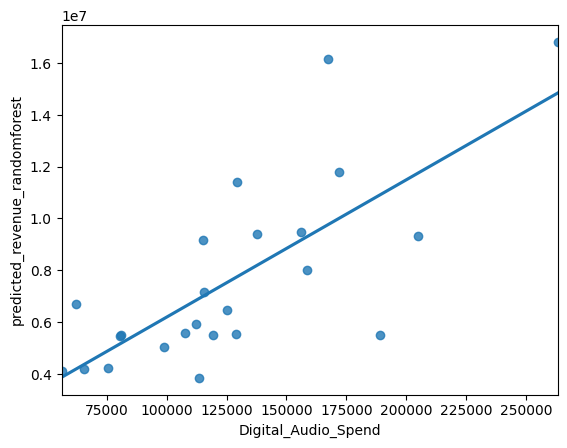

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total t

In [48]:
import seaborn as sns

# Add scatterplot with regression line
sns.regplot(data=mmm_monthly, x="Digital_Audio_Spend", y="predicted_revenue_randomforest", ci=None)